# Introduction
<font color='orange'>[Google Colab]</font> In the last Part, we used computer vision to count the number of vehicles in the images captured by the traffic camera. All the effort came down to this Part, where we will finally analyze the data.

In this Part, we will:
1. Load up the CSVs as DataFrames
2. Transform and simplify the DataFrames
3. Plot the respective num_cars over time

### Step 1: Import libraries
We'll just need:
1. pandas as pd
2. seaborn as sns
3. matplotlib.pyplot as plt

In [41]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Read the CSVs with num_cars
Mount your Drive, and we'll read the two CSVs that we exported from last Part into DataFrames.

We'll need the timestamp data as well, so make sure you have your parse_dates as True for one of the arguments.

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# Step 2: Read the CSVs from Part IV
df2019=pd.read_csv('/content/drive/MyDrive/Project CV x Traffic/Data2019v2.csv', parse_dates=['timestamp'])
df2020=pd.read_csv('/content/drive/MyDrive/Project CV x Traffic/Data2020v2.csv', parse_dates=['timestamp'])
print(df2019.info())
print(df2020.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype                                
---  ------                 --------------  -----                                
 0   timestamp              30236 non-null  datetime64[ns, pytz.FixedOffset(480)]
 1   image                  30236 non-null  object                               
 2   camera_id              30236 non-null  int64                                
 3   location.latitude      30236 non-null  float64                              
 4   location.longitude     30236 non-null  float64                              
 5   image_metadata.height  30236 non-null  int64                                
 6   image_metadata.width   30236 non-null  int64                                
 7   image_metadata.md5     30236 non-null  object                               
 8   num_cars               30236 non-null  int64                       

### Step 3: Turn the timestamp column into actual datetime objects
Currently, the values in the "timestamp" column are strings. 

You'll need to convert them into proper DateTime objects.

<details>
  <summary>Click here once for a hint</summary>
    <div><strong>Google "turn string into datetime python pandas"</strong></div>
</details>

In [64]:
# Step 3a: Turn timestamp string in the 2019 DataFrame to DateTime

In [ ]:
# Step 3b: Turn timestamp string in the 2020 DataFrame to DateTime

### Step 4: Set your timestamp column as index
Turn your "timestamp" column into your DataFrame's index so that we can perform time series analysis later on.

In [45]:
# Step 4a: Set your "timestamp" column as index for 2019 DataFrame
df2019.set_index('timestamp', inplace=True)


In [46]:
# Step 4b: Set your "timestamp" column as index for 2020 DataFrame
df2020.set_index('timestamp', inplace=True)

# Exploratory data analysis
Now that we're done with loading the data, the Steps henceforth will be visualization.

### Step 4: Plot histograms with num_car in 2019 and 2020
Let's plot the distribution of the num_car values in the two DataFrames.

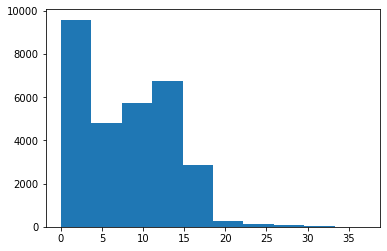

In [47]:
# Step 4a: Plot a histogram with 2019 Jan num_cars
plt.hist(df2019['num_cars'])
plt.show()

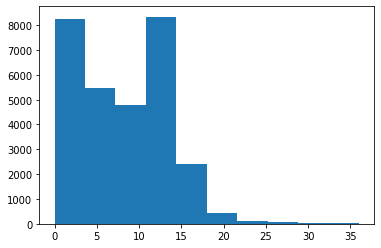

In [48]:
# Step 4b: Plot a histogram with 2020 Jan num_cars
plt.hist(df2020['num_cars'])
plt.show()

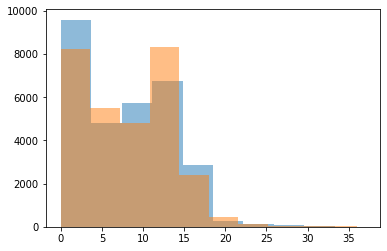

In [49]:
# Step 4c: Plot both histograms in the same plot
plt.hist(df2019['num_cars'], alpha=0.5)
plt.hist(df2020['num_cars'], alpha=0.5)
plt.show()

### Step 5: Resample your DataFrames by day
Let's take a look at how the numbers change over the month.

Declare two new variable that contain a day resample of your DataFrame, and we'll sum the numbers during our resample.

Useful resource: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

In [52]:
# Step 5: Resample your DataFrames by day
sum2019=df2019['num_cars'].resample('D').sum()
sum2020=df2020['num_cars'].resample('D').sum()

In [53]:
sum2019

timestamp
2018-12-31 00:00:00+08:00        6
2019-01-01 00:00:00+08:00     5869
2019-01-02 00:00:00+08:00     6778
2019-01-03 00:00:00+08:00     7672
2019-01-04 00:00:00+08:00     7738
2019-01-05 00:00:00+08:00     7622
2019-01-06 00:00:00+08:00     6827
2019-01-07 00:00:00+08:00     7832
2019-01-08 00:00:00+08:00     7710
2019-01-09 00:00:00+08:00     7843
2019-01-10 00:00:00+08:00     8117
2019-01-11 00:00:00+08:00     8069
2019-01-12 00:00:00+08:00     7852
2019-01-13 00:00:00+08:00     7564
2019-01-14 00:00:00+08:00     7955
2019-01-15 00:00:00+08:00     8343
2019-01-16 00:00:00+08:00     7973
2019-01-17 00:00:00+08:00     7279
2019-01-18 00:00:00+08:00     8056
2019-01-19 00:00:00+08:00     8073
2019-01-20 00:00:00+08:00     7042
2019-01-21 00:00:00+08:00     7737
2019-01-22 00:00:00+08:00     7642
2019-01-23 00:00:00+08:00     7372
2019-01-24 00:00:00+08:00     7633
2019-01-25 00:00:00+08:00     7730
2019-01-26 00:00:00+08:00     7282
2019-01-27 00:00:00+08:00     6212
2019-01-28

In [54]:
sum2020

timestamp
2019-12-31 00:00:00+08:00        2
2020-01-01 00:00:00+08:00     6813
2020-01-02 00:00:00+08:00     7519
2020-01-03 00:00:00+08:00     8159
2020-01-04 00:00:00+08:00     8032
2020-01-05 00:00:00+08:00     6958
2020-01-06 00:00:00+08:00     8090
2020-01-07 00:00:00+08:00     7738
2020-01-08 00:00:00+08:00     8068
2020-01-09 00:00:00+08:00     8566
2020-01-10 00:00:00+08:00     8151
2020-01-11 00:00:00+08:00     8420
2020-01-12 00:00:00+08:00     7609
2020-01-13 00:00:00+08:00     8305
2020-01-14 00:00:00+08:00     8421
2020-01-15 00:00:00+08:00     8157
2020-01-16 00:00:00+08:00     8212
2020-01-17 00:00:00+08:00     8263
2020-01-18 00:00:00+08:00     8328
2020-01-19 00:00:00+08:00     6783
2020-01-20 00:00:00+08:00     8137
2020-01-21 00:00:00+08:00     8323
2020-01-22 00:00:00+08:00     8584
2020-01-23 00:00:00+08:00     8018
2020-01-24 00:00:00+08:00     6876
2020-01-25 00:00:00+08:00     5822
2020-01-26 00:00:00+08:00     6048
2020-01-27 00:00:00+08:00     6030
2020-01-28

### Step 6: Plot your resampled DataFrame num_cars sum 
Your resample DataFrame would have summed up the num_cars over the daily period. 

Plot the .values of num_cars from the two DataFrames on top of each other. If you don't use the values alone, you won't be able to compare them in the same plot.

You should also use the values from the second row onwards because the first row in both DataFrames are anomalous, i.e. 2019 DataFrame contains 2018 data in the first row.

Again, don't worry if they don't look similar.

<details>
    <summary><font color = 'green'>Click here once to see if your results match with ours.</font></summary>
    <div>
        <img src = 'https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/ResampleDayPlot.png'>
    </div>
</details>

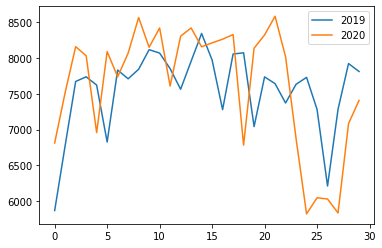

In [58]:
# Step 6: Plot the resampled num_cars sum for 2019 and 2020
plt.plot(sum2019[1:-1].values, label='2019')
plt.plot(sum2020[1:-1].values, label='2020')
plt.legend()
plt.show()

### Step 7: Create a weekday column for your resampled DataFrame
Now that we've seen how the numbers look over the month, let's see the average of each day of the week.

Extract the day of week using DateTimeIndex, and create a new column.

You'll see something like this for the 2019 DataFrame:

![DayOfWeekResampledDataFrame](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectComputerVisionTraffic/DayOfWeekResampledDataFrame.png)



In [65]:
# Step 7a: Add the dayOfWeek column for 2019 DataFrame
df2019['dayofweek']=df2019.index.dayofweek

In [66]:
# Step 7b: Add the dayOfWeek column for 2020 DataFrame
df2020['dayofweek']=df2020.index.dayofweek

### Step 8: Perform a groupby operation with the dayOfWeek and get the mean
Let's see how many cars there are on average by weekday. 

Caution: before you groupby, <strong>remove the first row of your DataFrame first.</strong> 

That's because the first row contains data from the preceding year and will mess with your .mean operation during groupby.

Slice your DataFrame to exclude the first row, perform a groupby operation based on 'dayOfWeek' and get the mean.

In [67]:
df2019

,image,camera_id,location.latitude,location.longitude,image_metadata.height,image_metadata.width,image_metadata.md5,num_cars,dayofweek
timestamp,,,,,,,,,
2018-12-31 23:59:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,48f34eaa179e51989c8f937631da1bce,6,0
2019-01-01 00:00:44+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,ed9a57e100a83156605b19ec84bdc2fe,3,1
2019-01-01 00:01:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,c2713943d69482eaa4191454c76af1c8,2,1
2019-01-01 00:03:45+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,7892491f53adea153a2345de7d5e6873,5,1
2019-01-01 00:05:25+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,fa2696a66b3c5bb982e26b765f2d1b98,4,1
...,...,...,...,...,...,...,...,...,...
2019-01-31 23:54:47+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,d070313c2ca6bde6c44a074d136dcf05,7,3
2019-01-31 23:56:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,41786bfddd62f3138dd9d71b6210af28,8,3
2019-01-31 23:57:27+08:00,https://images.data.gov.sg/api/traffic-images/...,1709,1.313842,103.845603,480,640,afd6213f51bda947cc27b98082c21f53,3,3


In [75]:
# Step 8a: Perform groupby with dayOfWeek for 2019 DataFrame
dayofweek2019=df2019[1:].groupby('dayofweek').agg({'num_cars': 'mean'})
dayofweek2019

,num_cars
dayofweek,
0,7.861189
1,7.711788
2,7.686267
3,8.991020
4,8.208106
5,7.953818
6,7.061303


In [76]:
# Step 8b: Perform groupby with dayOfWeek for 2020 DataFrame
dayofweek2020=df2020[1:].groupby('dayofweek').agg({'num_cars': 'mean'})
dayofweek2020

,num_cars
dayofweek,
0,7.820368
1,7.848046
2,7.928308
3,8.275625
4,9.309206
5,7.940322
6,7.012542


### Step 9: Plot the groupby mean of the two groupby DataFrames
After you're done with the groupby operation, let's plot and see what the average of num_cars is for each day of the week.

Note: If you get an odd dip on Monday (1) for 2020, that's because you didn't remove the first anomalous row that brings down the entire Monday average.


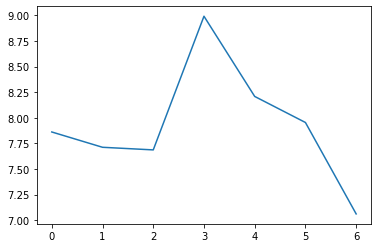

In [78]:
# Step 9a: Plot a lineplot with dayOfWeek (the index) and the num_cars values for 2019
plt.plot(dayofweek2019)
plt.show()

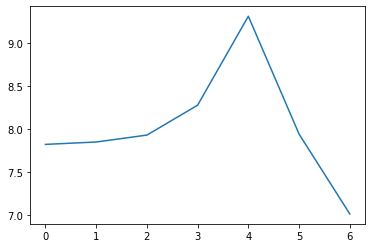

In [79]:
# Step 9b: Plot a lineplot with dayOfWeek (the index) and the num_cars values for 2020
plt.plot(dayofweek2020)
plt.show()

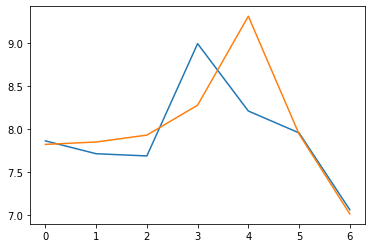

In [80]:
# Step 9c: Plot a lineplot with dayOfWeek (the index) and the num_cars values for both years on the same plot
plt.plot(dayofweek2019)
plt.plot(dayofweek2020)
plt.show()

# The End
We're done! 

In this section, we compared the Jan in both years to see if there was any observable differences in the traffic levels.

<details>
  <summary><font color='green'>Is there a difference between the month of Jan for 2019 and 2020? Click once to see what we think.</font></summary>
    <div><strong>No</strong></div>
</details>

Does it feel anticlimatic after finding that out? 

Don't be discouraged, you gained more than you think.

In fact, you acquired so many new skills. To recap, you:
1. Acquired the superpower of concurrency
2. Learned to make many API calls at one go
3. Saved many images at one time
4. Configured your Google Colab environment for GPU-enabled object detection
5. Performed object detection

<strong>If you're keen, here are some more things you can try:</strong>
- Use May 2019 and 2020 data for an observable difference in num_cars

We hope this project series has UpLevelled you and your skills.

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come.

Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG

<strong>Most importantly, UpLevel won't be what it is today without learners like yourself so help us grow by spreading the word and get more subscribers <font color='red'><3</font></strong>
